# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [85]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [42]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [26]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [17]:
# Method 1
employee.groupby(['Department']).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [36]:
# Method 2

employee.pivot_table(index=["Department"],  aggfunc='mean')

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [37]:
# your answer here
employee.pivot_table(index=["Department", "Title"],  aggfunc='mean')

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [41]:
# your answer here
employee.pivot_table(index=["Title", "Years"])

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [63]:
# your answer here
employee.pivot_table(index=["Title"], 
                    columns=["Department"], aggfunc={'Salary':np.mean, 'Name':'count'})




Name            Salary            
Department   HR   IT Sales     HR    IT Sales
Title                                        
VP          1.0  1.0   NaN   70.0  70.0   NaN
analyst     2.0  2.0   NaN   32.5  32.5   NaN
associate   NaN  1.0   2.0    NaN  60.0  55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [65]:
# your answer here
employee['Salary'].describe() 

'''We see there are 9 employees, the mean and median are 7K apart which means that the most people earn more then avarage
but that a lot of people also get the minumim payed.'''

count     9.000000
mean     48.888889
std      16.541194
min      30.000000
25%      35.000000
50%      55.000000
75%      60.000000
max      70.000000
Name: Salary, dtype: float64

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here
'''There are no missing values? Or am I interpretering the question wrong?'''

In [76]:
employee.columns = ['Employee_count', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary']

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [77]:
# your answer here
'''Yes'''


employee.pivot_table(index=["Department"], 
                     aggfunc={'Salary':np.sum, 'Employee_count':'count'})



,Employee_count,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [78]:
# your answer here

employee.pivot_table(index=["Department", "Title"], 
                     aggfunc={'Years':np.sum, 'Salary':np.mean})



Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [28]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [33]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [32]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [84]:
# your answer here
X = fitbit["Minutes Very Active"]
Y = fitbit["Steps"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
r_value

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

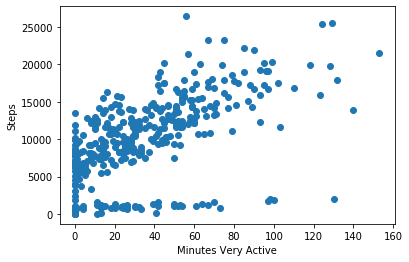

In [89]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active') 
plt.ylabel('Steps') 

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
'''I don't think there is a linear relation, but you see that people that are very active, mostly make a lot of steps'''

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [90]:
# your answer here
X = fitbit["Minutes Sedentary"]
Y = fitbit["Steps"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
r_value

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

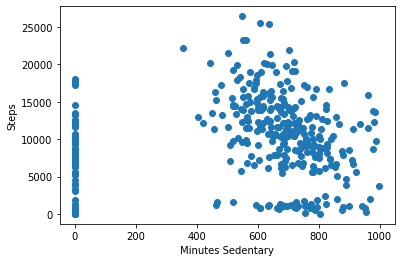

In [91]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary') 
plt.ylabel('Steps') 


"""If the people who are very sedentary but do make a lot of steps (?strange) are filtered out it's still does not a linear
correlatoin"""

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [92]:
# your answer here
X = fitbit["MinutesOfSleep"]
Y = fitbit["Steps"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
r_value

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

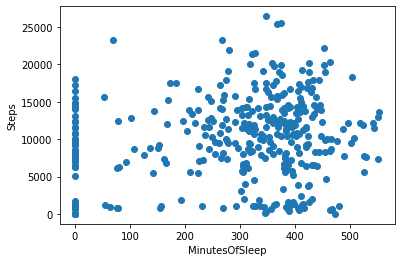

In [93]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep') 
plt.ylabel('Steps') 

"""No correlation again, but I'm starting to wonder who all these people are on the vertical line""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [99]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].sort_values("Steps")

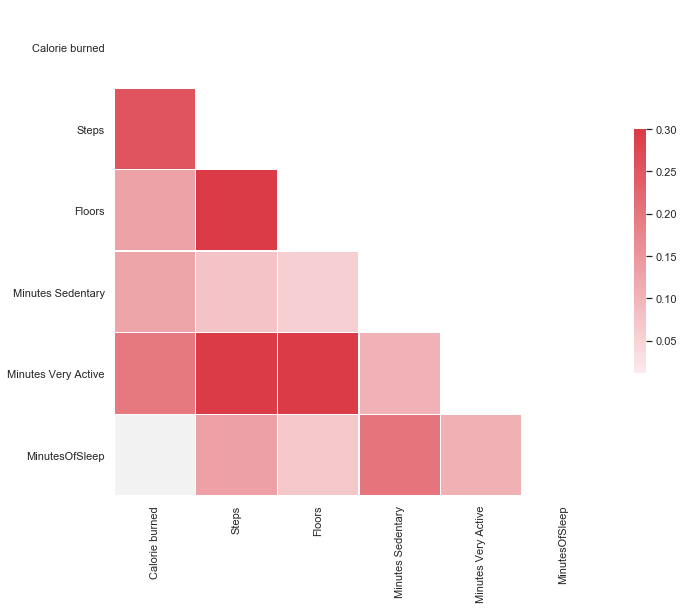

In [100]:
# your answer here
sns.set(style="white")

corr = cor_fit.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here
'''Floors and minutes very active are.'''

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [29]:
time_grades = pd.read_csv('Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E5A83CD30>,
      dtype=object)

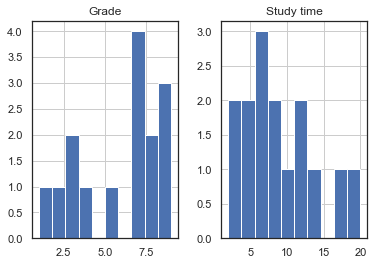

In [102]:
# your answer here
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [103]:
# your answer here
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [104]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [ ]:
''' For both there is to say the chances of correlation are quite high. I would choose to use the Pearson method
while this is the most appropriate for interval measurements '''

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [106]:
X = time_grades["Study time"]
Y = time_grades["Grade"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('the r-value is:'+ str(r_value))

The slope is: 0.41755319148936165
The intercept is: 2.175354609929079
the r-value is:0.7980456073578857


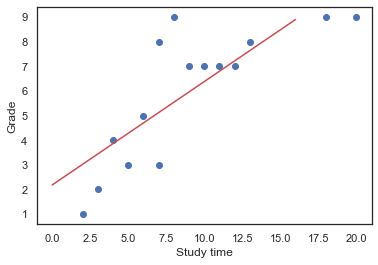

In [107]:
plt.scatter(x="Study time", y="Grade", data=time_grades)
plt.xlabel('Study time') 
plt.ylabel('Grade') 

x = np.linspace(0,16,100)
y = 0.42*x+2.18

plt.plot(x, y, '-r', label='plot')


"""It seems there some kind of correlation between them, but it's definitly not super closely correlated."""

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
''' Pearson is the most appropriate on an interval scale, and the relationship change is 
linear (water temperature versus water appearance (or from)). The spearman is more appropriate for an 
ordinal scale. When there is not an absolute change in the change of the numbers. 
The value tends to change together but is not very linear (I would use a scatter plot for these results).  '''